# ggplot2 at Joint Genome Institute

This notebook contains the materials for the ggplot2 lecture hosted at Joint Genome Institute on March 7 2018. These materials were prepared by Rebecca Barter.

## Useful resources for learning ggplot2

- **ggplot2** book (https://www.amazon.com/dp/0387981403/ref=cm_sw_su_dp?tag=ggplot2-20) by Hadley Wickham
- **The layered grammar of graphics** (http://vita.had.co.nz/papers/layered-grammar.pdf) by Hadley Wickham

## Materials outline

I will begin by providing an overview of the layered grammar of graphics upon which ggplot2 is built. I will then teach ggplot2 by layering examples ontop of one another. Finally, I will introduce some advanced topics such as faceting and themes. The general outline of the lecture is as follows:

1. Layered grammar of graphics

1. Basic ggplot2 plot types

1. Grouping in ggplot2

1. Scales, axes, legends and positioning

1. Faceting

1. Themes: deviating from the defaults to produce beautiful graphics

By the end of this tutorial, you will be able to produce beautiful graphics such as this:
<img src="beautiful_plot.png" width="800">

# The layered grammar of graphics

Hadley Wickham built ggplot2 based on a set of principles outlines in his *layered grammar of graphics* (inspired by Wilkinson's orginal *grammar of graphics*). The basic idea is that a statistical graphic is a mapping from **data** to **aesthetic** attributes (such as colour, shape, and size) of **geometric** objects (such as points, lines, and bars).

We will discover that each piece of terminology mentioned above corresponds to a type of object in ggplot2.

- **data**: a data frame containing the variables that you want to visualize

- **geoms**: geometric objects (circles, lines, text) that you will actually see

- **aesthetics**: the mapping from the data to the geographic objects (e.g. by describing position, size, colour, etc)



# Setup: load the gapminder data

In this section, we are going to make our first plot. This plot will be based on the `gapminder` dataset that can be loaded from the following link: https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder-FiveYearData.csv. Below, we show the first 6 rows of the `gapminder` dataset.

In [3]:
# set up the notebook parameters
options(repr.plot.width=6, repr.plot.height=4)
# load in the ggplot2 library
library(ggplot2)

# if the data is already saved in the current local folder:
gapminder <- read.csv("data/gapminder-FiveYearData.csv")
# to download the data directly into R:
# gapminder <- read.csv("https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder-FiveYearData.csv")

In [4]:
head(gapminder)

country,year,pop,continent,lifeExp,gdpPercap
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134


# The `ggplot()` function: linking the plot to the data

The first argument we will use is the `ggplot` function. This function allows us to define the data that we will be using to make the plot, as well as the aesthetic properties that will be mapped onto the geometric objects. That is, we will tell ggplot which data (a data frame) we are interested in and how each of the variables in our dataset will be used (e.g. as an x or y coordinate, as a coloring variable or a size variable, etc).    

Below, we define our first ggplot object using the `ggplot` function, with the gapminder dataset. The code below defines a plot that has access to all of the `gapminder` variables, but since we have not specified which variables are to be used for which aesthetic properties (i.e. x- and y-coordinates, color, size, etc) nor which geometric objects we want to use (points, bars, etc), the output of the ggplot function is blank.

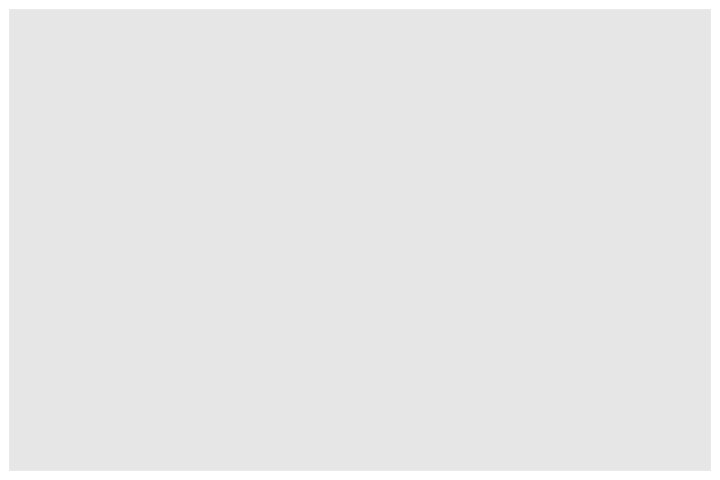

In [8]:
ggplot(gapminder)

To tell ggplot which variables in `gapminder` should be used for which aesthetic properties, we need to specify an aesthetic function. This function can be provided as an argument of the ggplot function. Note that **ggplot now treats the columns of our data frame `gapminder` as variables themselves, so we don't need to specify them directly** (.e.g. we can just say `gdpPercap` inside the ggplot functions rather than needing to specify `gapminder$gdpPercap` or `"gdpPercap"` (in quotes))

For example, by providing an aesthetic function as the second argument of the ggplot function, we can tell ggplot to use the `gdpPercap` variable as the x-position and the `lifeExp` variable as the y-position. The output of this function is a grid with `gdpPercap` as the x-axis and `lifeExp` as the y-axis. However, **we have not yet told ggplot what type of geometric object the data will be mapped to**, so again, no data has been displayed.

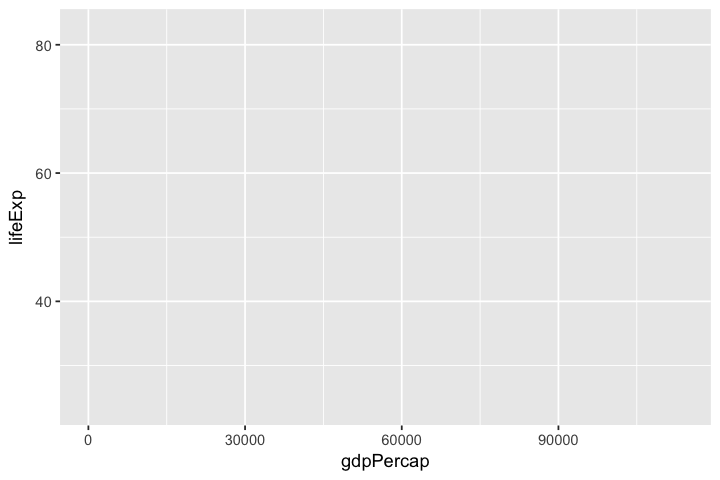

In [9]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp))

## Geometric objects: our next layer

Next, we will add a "geom" layer to our ggplot object. Any geometric layer we add to our plot above will inherit the aesthetic mappings specified in our `ggplot()` function. 

For example, below we add a points layer which will place a point for each (x = `gdpPercap`, y = `lifeExp`) found in the data

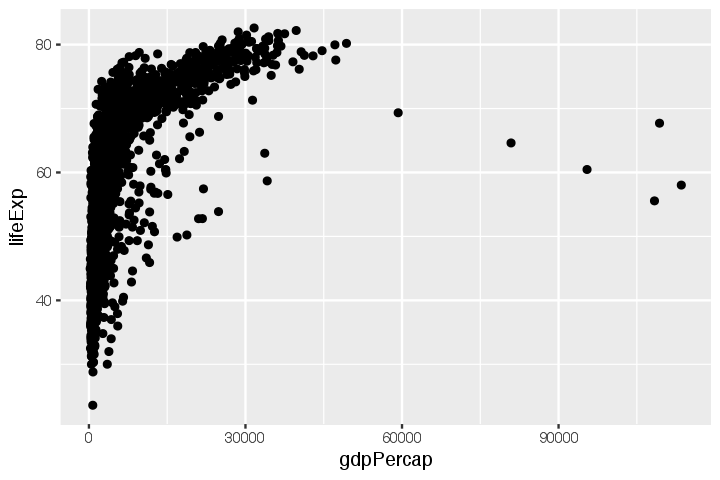

In [4]:
# describe the base ggplot object and tell it what data we are interested in along with the aesthetic mapping
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp)) +
  # add a points layer on top
  geom_point()

What we have done is map each country-year (row) in the data to a point in the space defined by the `gdpPercap` and `lifeExp` value. The end result is an ugly blob of points. Fortunately, there are many things that we can do to make this blob of points pretter and more informative.

## Specifying aesthetic properties

For example, we can change the global aesthetic properties (i.e. aesthetic properties not linked to the data itself) by specifying arguments in the `geom_point()` function. We can increase transparency of all points by setting the `alpha` argument to a low value (`alpha = 0` corresponds to totally transparent and `alpha = 1` corresponds to no transparency), changing the color of the points to be grey instead of black, and making the points smaller using the `size` argument.

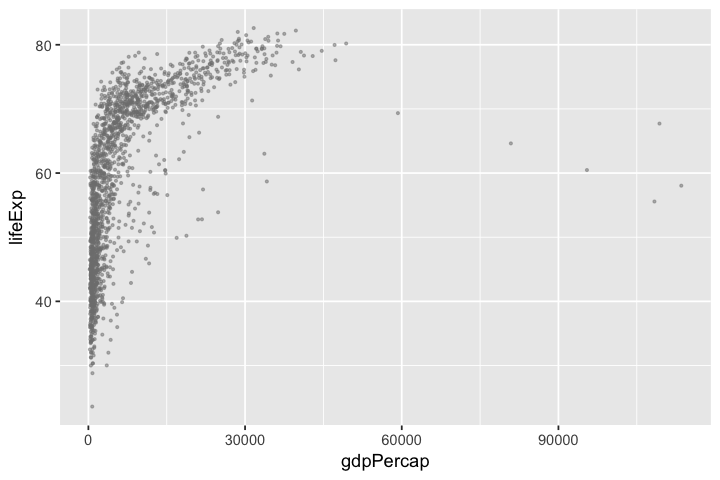

In [11]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point(alpha = 0.5, col = "grey50", size = 0.5)

Note that the above argument changed the alpha value and color for *all of the points at once*. 

One of the truly powerful features of ggplot2 is the ability to change these aesthetics based on the data itself. Perhaps we want to color each point by `continent` so that all countries from the same continent have the same color. Instead of separating the data into five different subsets (based on the possible values of continent), and adding the different colored points separately, we can simply add all the points once and add an colour aesthetic mapping for `continent`.

**Note that whenever we are using a variable from the data to describe an aesthetic property of a geom, this aesthetic property needs to be included in the `aes()` function. If we want to provide a global aesthetic property (that doesn't depend on the data, it can be included as a global argument of the `geom_` function.**

In [12]:
# list all the unique continents
unique(gapminder$continent)

[1] Asia     Europe   Africa   Americas Oceania 
Levels: Africa Americas Asia Europe Oceania

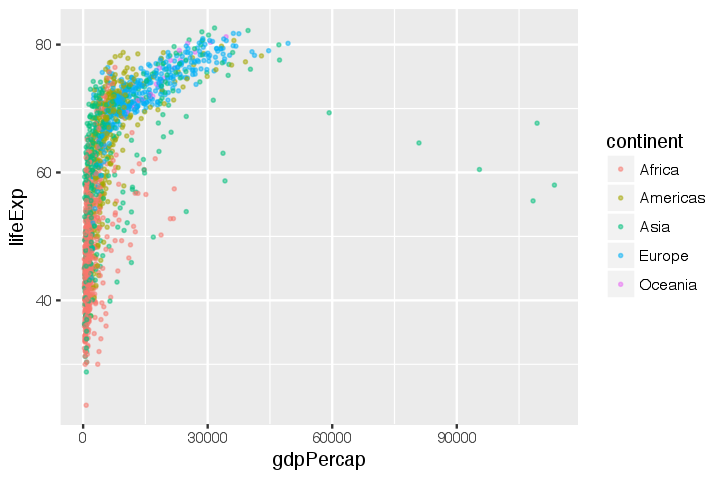

In [7]:
# add a color aesthetic
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point(alpha = 0.5, size = 0.5)

We could also add aesthetic mappings for other features such as shape, size, transparancy (alpha), and more! For example, changing the size based on population we use the argument `size = pop` below.

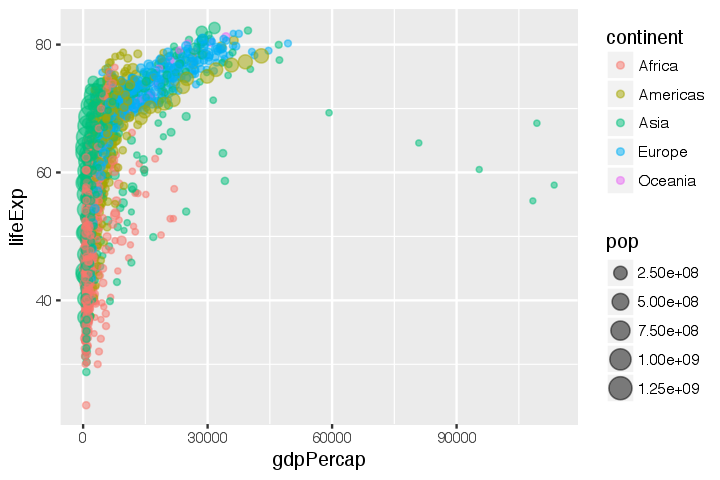

In [8]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  geom_point(alpha = 0.5)

## A word of caution: ordering matters!

One word of warning is that aesthetic properties specified later will have priority over those specified earlier. For example, if in our `aes()` function we defined color based on the `continent` variable, but in our `geom_` function we defined the global color to be `grey50`, the global color would take precedence since it was defined later.

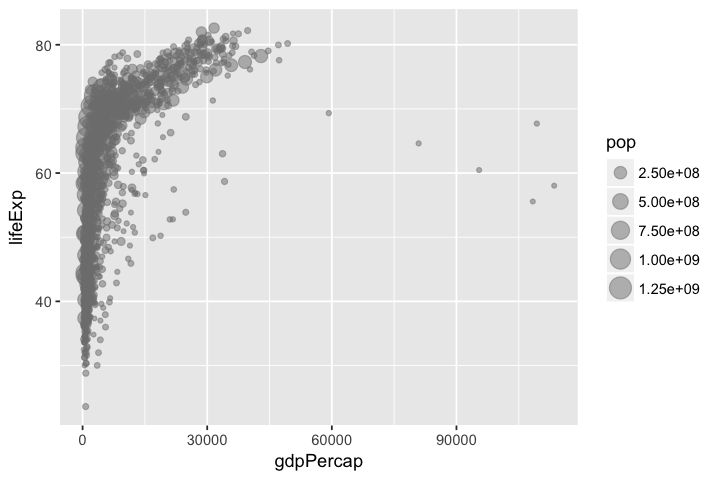

In [13]:
# an example where ordering matters:
# color = "grey50" is defined in geom_point() after specifying the aesthetic mappeing color = "continent"
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  geom_point(alpha = 0.5, color = "grey50")

# Other types of geom layers

So far, we have only seen scatterplots (point geoms), however, there are many other geoms we could add, including:

- lines

- histograms

- boxplots and violin plots

- barplots

- smoothed curves

While scatterplots are definitely the easiest to add, since each point in the data is mapped to a particular point in space, these other types of geoms need to group data together in some way. 

## Line plots and grouping

For example, suppose that we wanted to create a line plot showing how life expectency changes over time by country. Theoretically we could just change `geom_point` to `geom_line` and change our `x` aesthetic to `year` and we would be good to go. Below we do just this.

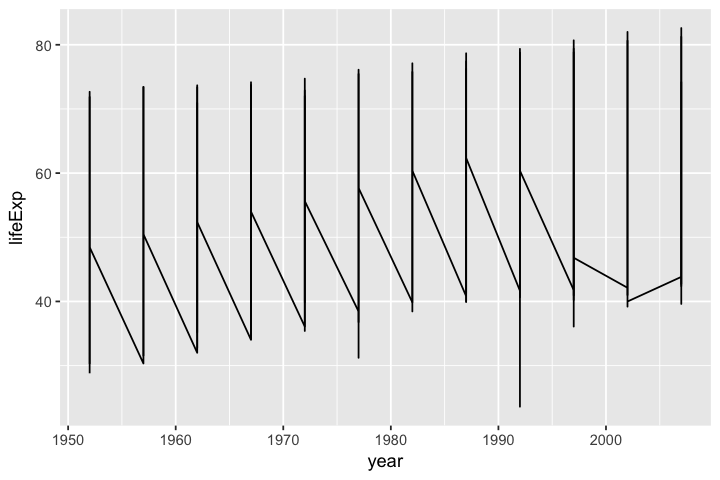

In [15]:
ggplot(gapminder, aes(x = year, y = lifeExp)) +
  geom_line()

Clearly something has gone wrong: our plot should have many different lines, one for each country, but instead, we have this strange zig-zag pattern. What's happening is that we haven't told ggplot which rows in the data should be *grouped* together, i.e. we haven't specified that we wanted one line for *each country*!

To fix this problem, we need to specify which variable should be used as the grouping aesthetic (so that there will be one line drawn for the data specified by each level of the grouping variable).

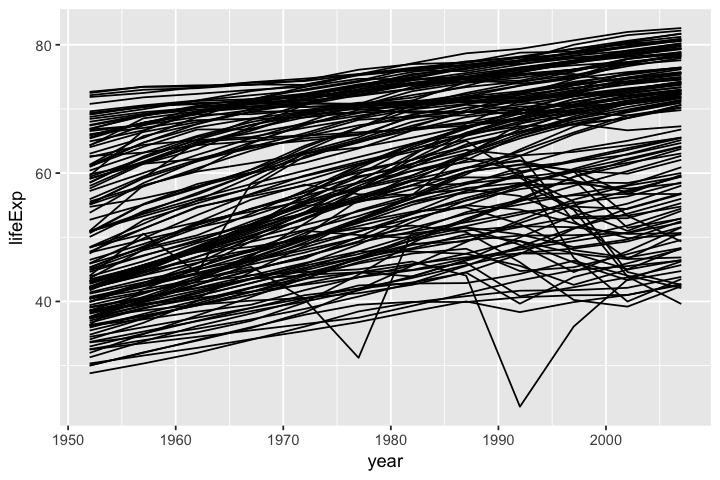

In [16]:
ggplot(gapminder, aes(x = year, y = lifeExp, group = country)) +
  geom_line()

Next, we can add aesthetics just as we did in the scatterplot examples above. To use color to help us identify which continent each country belongs to, we use the `color` aesthetic.

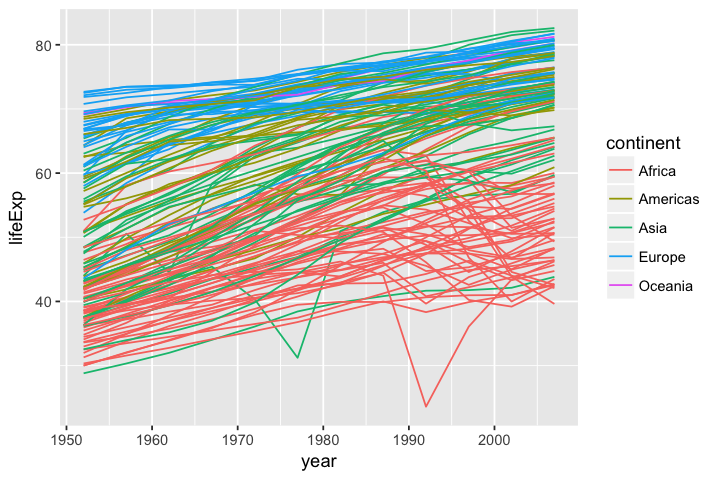

In [18]:
ggplot(gapminder, aes(x = year, y = lifeExp, group = country, color = continent)) +
  geom_line()

Note that it would be a bad idea to color each line by `country` itself since there would be far too many colors. Humans can only process a max of 7 or so colors at once, so it is in general a good idea not to overdo the use of colors in your plots!

If the gropuing variable happens to be used also as a color (or alpha, size, etc) variable, then you can simply specify the color (or alpha, size, etc) variable (leaving the grouping variable unspecified). For example, below we group by continent in two different ways (can you explain why the plots look like zig-zags?)

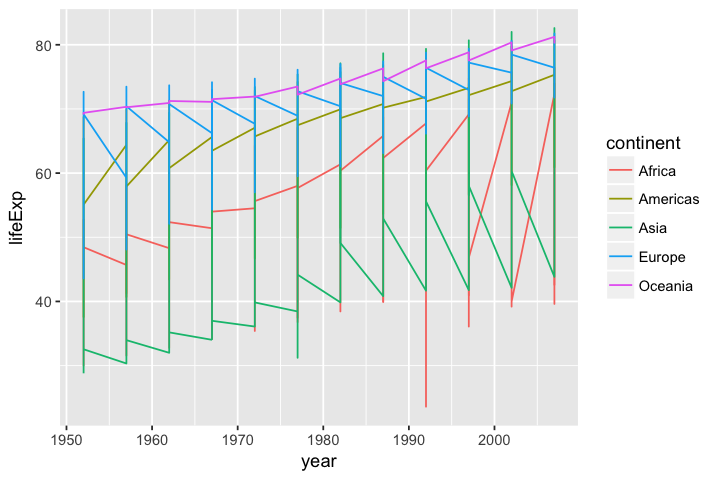

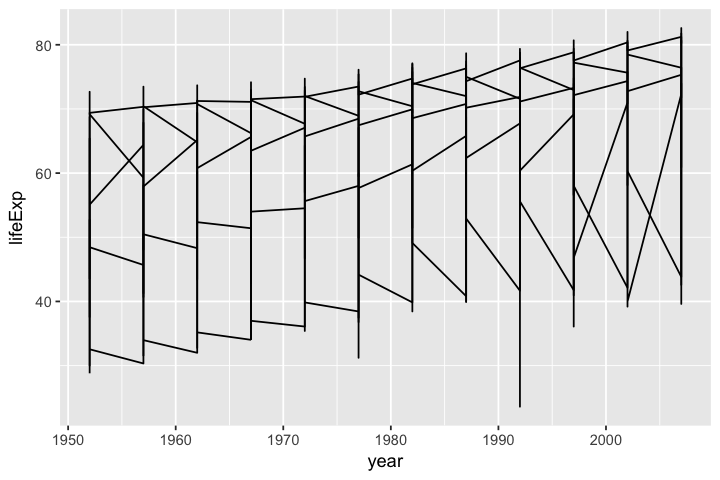

In [23]:
# grouping by specifying color
ggplot(gapminder, aes(x = year, y = lifeExp, color = continent)) +
  geom_line()
# grouping by specifying group
ggplot(gapminder, aes(x = year, y = lifeExp, group = continent)) +
  geom_line()

## Boxplots

Unlike for line plots and scatterplots, basic boxplots present only one continuous variable based on the y-aesthetic. However, even if we are only presenting one variable, we still need to provide both an `x` and `y` aesthetic, so we could set the `x` aesthetic to an arbitrary value (e.g. `x = 1`).

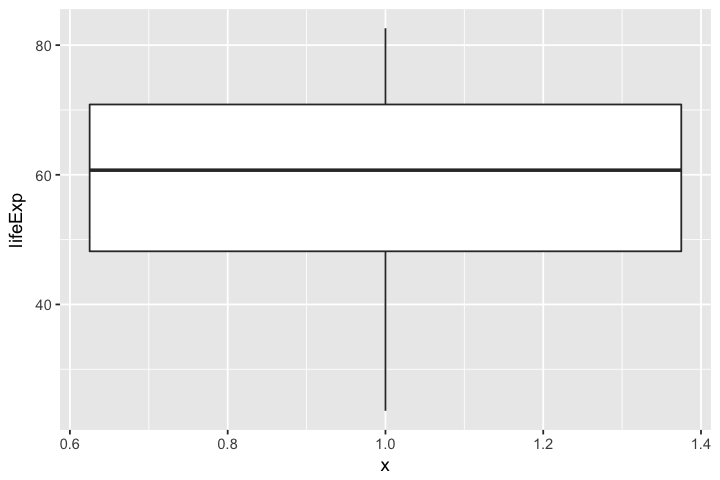

In [32]:
ggplot(gapminder, aes(x = 1, y = lifeExp)) +
  geom_boxplot()

It is more common, however, to use boxplots to compare distirbutions of a continuous variable across different groups of the data. For example, we could compare the life expectency across different continents. To do this, we again need to specify the grouping variable (`continent`). We could do this just as we did before by specifying `group = continent`.

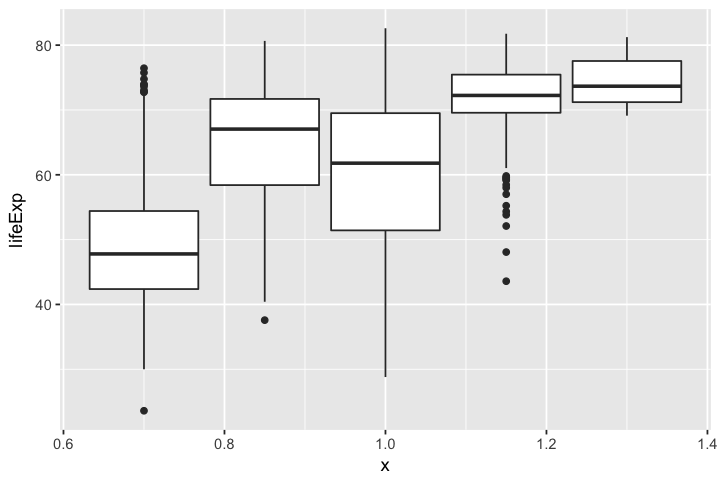

In [33]:
ggplot(gapminder, aes(x = 1, y = lifeExp, group = continent)) +
  geom_boxplot()

However, it would be much nicer if we could have the x-axis tell us which boxplot corresponded to which continent! Similarly to how we could specify the groupings of the line plot directly using the `color` argument in the `aes()` function, we can specify the groupings of the boxplot using the `x` argument in the `aes()` function.

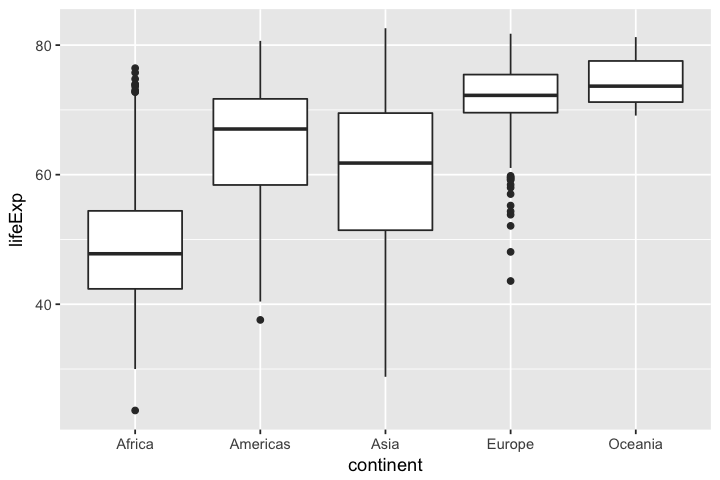

In [34]:
ggplot(gapminder, aes(x = continent, y = lifeExp)) +
  geom_boxplot()

If we wanted to liven our plot up a little bit, we could also specify the color of the boxplots based on the continent. 

- Note that for boxplots, the `color` aesthetic refers to the outline of the boxes, and the `fill` aesthetic refers to the color inside the boxes. 

- Note also that we cannot remove the `x = continent` variable in this case as we did before when grouping by color because boxplots require that an `x` aesthetic is provided.

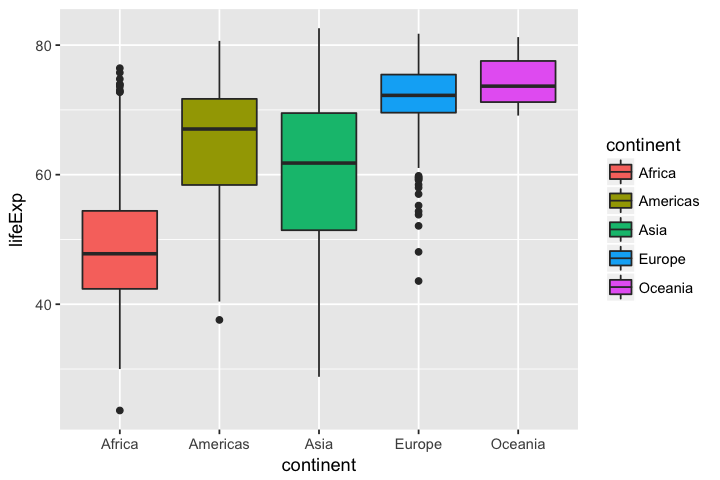

In [36]:
ggplot(gapminder, aes(x = continent, y = lifeExp, fill = continent)) +
  geom_boxplot()

## Histograms

Histograms, similarly to boxplots, are designed to display the distribution of only one variable (corresponding to the `x` aesthetic). Unlike for boxplots, however, we do not need to also provide a `y` aesthetic for histograms.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


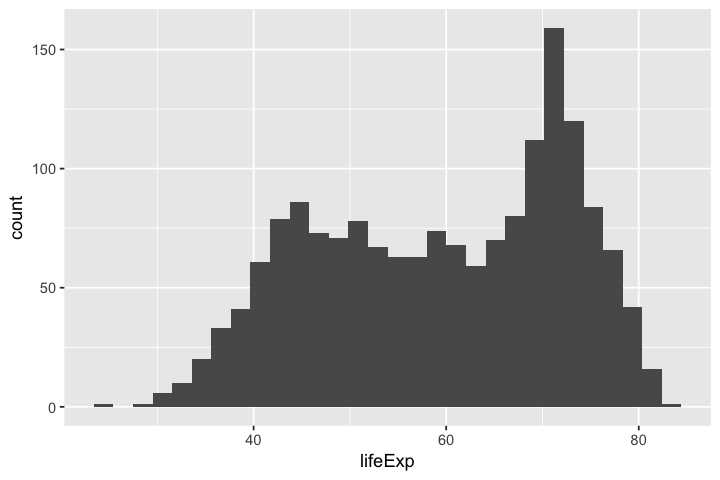

In [37]:
ggplot(gapminder, aes(x = lifeExp)) + 
  geom_histogram()

By default the y-axis is the "count" i.e. number of rows for which the `lifeExp` value fell into the corresponding bin. To change the y-axis to the density, we need to specify `y = ..density..` (I'm not sure why we have the `..` on either side of the word density but I assume that it is just to tell ggplot that this does not correspond to a variable in our dataset.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


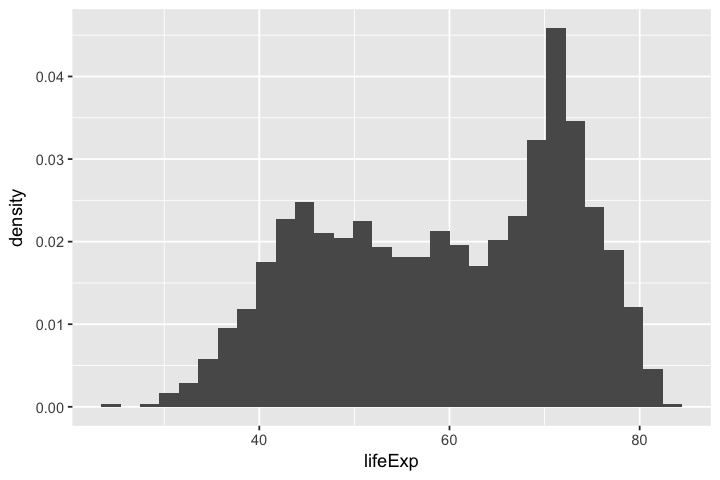

In [38]:
ggplot(gapminder, aes(x = lifeExp, y = ..density..)) + 
  geom_histogram()

Note the warning that we get every time: "`stat_bin()` using `bins = 30`. Pick better value with `binwidth`." It is always a good idea to actually choose the binwidth yourself by setting a global binwidth parameter in the `geom_histogram` function.

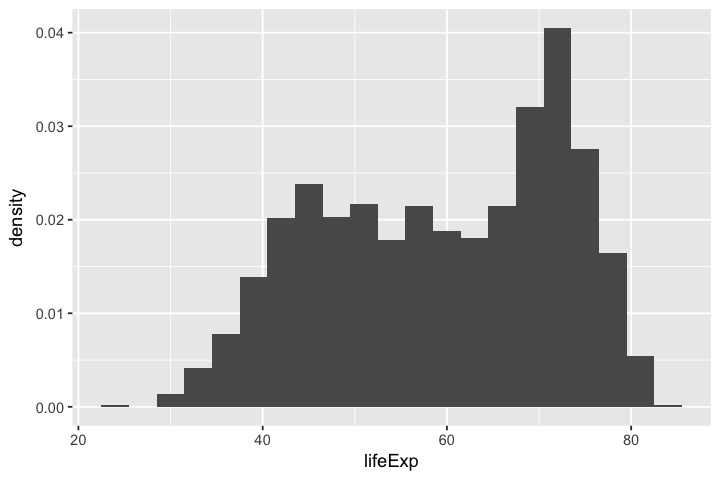

In [43]:
ggplot(gapminder, aes(x = lifeExp, y = ..density..)) + 
  geom_histogram(binwidth = 3)

I also like to put a white outline on each bar for aesthetic purposes. This can be done using the global histogram `color` parameter (as opposed to the `aes()` color parameter since we are not using the data to set the color).

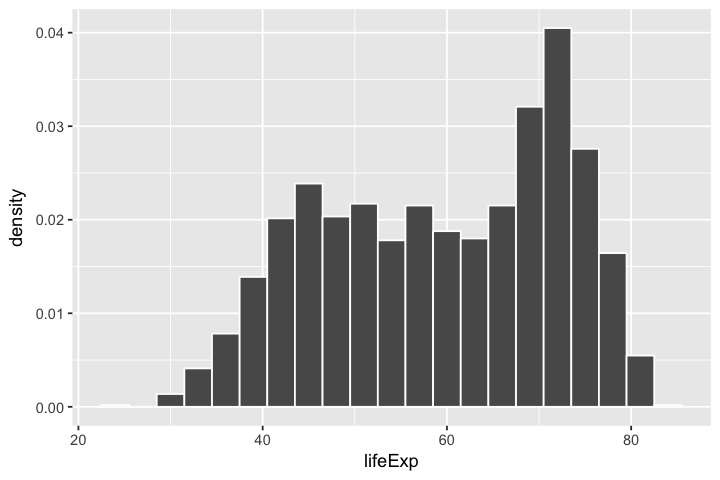

In [42]:
ggplot(gapminder, aes(x = lifeExp, y = ..density..)) + 
  geom_histogram(binwidth = 3, color = "white")

## Bar plots

Bar plots are similar to histograms in that they are typically used to count values in bins, except for bar plots these bins are usually levels of a categorical variable rather than bins of a continuous variable.

The mapping mechanism for bar plots is slightly different to what we have seen up until now. By default, `geom_bar()` will count the number of rows that lie in each level of the specified categorical variable.

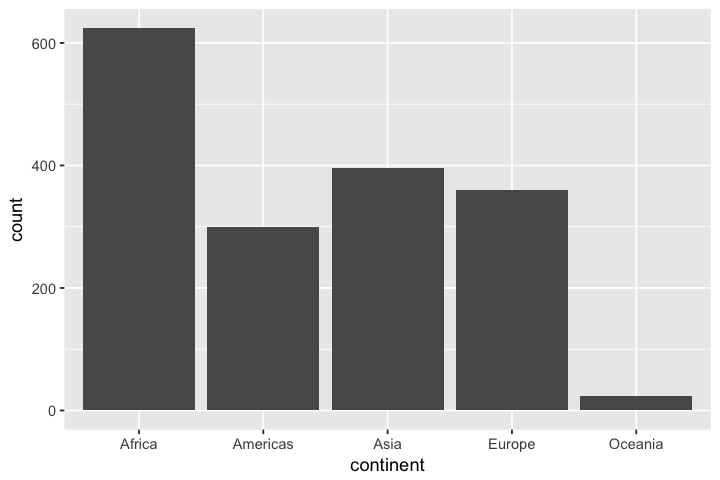

In [53]:
ggplot(gapminder, aes(x = continent)) + 
  geom_bar()

However, this isn't quite what we actually wanted: recall that there are multiple year entries for each country in the data: this approach is counting each country 12 times!

Instead we need to define a new data frame that counts how many *unique* countries are in each continent.

The best way to do this is to use the functions from the dplyr package in R.

In [57]:
library(dplyr)
# identify how many countries are in each contininet
# (using a little dplyr!)
continent_summary <- gapminder %>% 
    group_by(continent) %>%
    summarise(n_countries = length(unique(country)))
continent_summary

continent,n_countries
Africa,52
Americas,25
Asia,33
Europe,30
Oceania,2


We can then use this new data frame in our ggplot function, however, when providing a `y` variable with `geom_bar`, we need to specify `stat = "identity` that tells `geom_bar` to plot a bar up to the specified y-value for each x-value (rather than counting the number of rows for each level of the x-value).

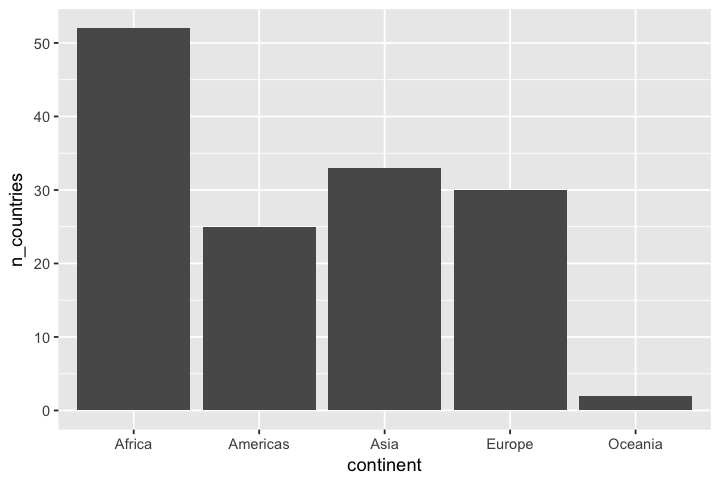

In [59]:
ggplot(continent_summary, aes(x = continent, y = n_countries)) +
    geom_bar(stat = "identity")

## Smoothed curves and adding multiple layers

Let's head back to the scatterplot example from earlier. Sometimes we want to be able to add a smoothed curve to our scatterplots. Fortunately this is very easy to do with a `geom_smooth()` layer.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


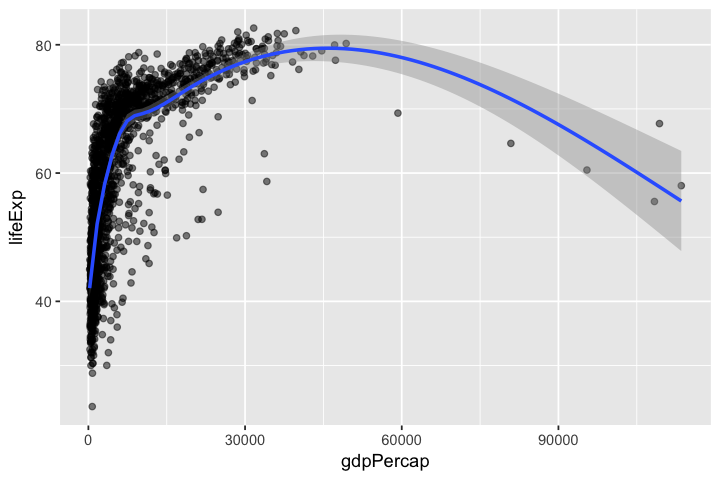

In [73]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point(alpha = 0.5) +
  geom_smooth()

This is the first time we have seen multiple geom layers used at once (a scatterplot and a smoothed curve). When using multiple layers at the same time, **aesthetic options specified in the `ggplot()` function will apply to *all layers***. 

If we wanted to color the points by continent and size by population, 

# Scales

We are going to return to our original scatterplot example to discuss scales, legend and positioning. 

To remind you, this scatterplot showed GDP per capita against life expectancy for each country colored by continent and sized by population.  

To keep things simple, let's filter to a single year.

In [13]:
library(dplyr)
gapminder_2007 <- gapminder %>% filter(year == 2007)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



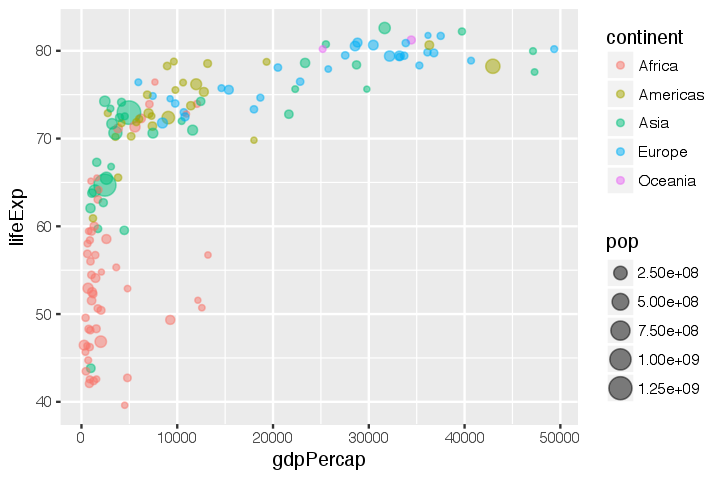

In [14]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  geom_point(alpha = 0.5)

The scale of a plot describes the features of the space in which it is plotted. Arguably, it would be better to show `gdpPercap` on a logarithmic scale, rather than in its raw form. Fortunately, this is easy to do using a `scale` function, which can be considered another layer that transforms our plot.

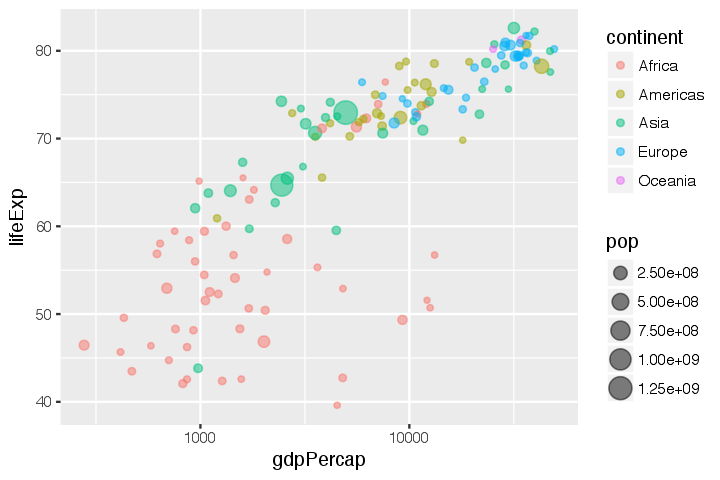

In [15]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  geom_point(alpha = 0.5) +
  scale_x_log10()

The default x- (and y-) axes scales are `scale_x_continuous` and `scale_y_continuous`, but other options include `scale_x_sqrt` and `scale_x_reverse`.

Each of these scale functions has many options including changing the limits, the breaks, etc. For example in the plot below, we manipulate the x-axis by providing arguments to our `scale` function of choice.

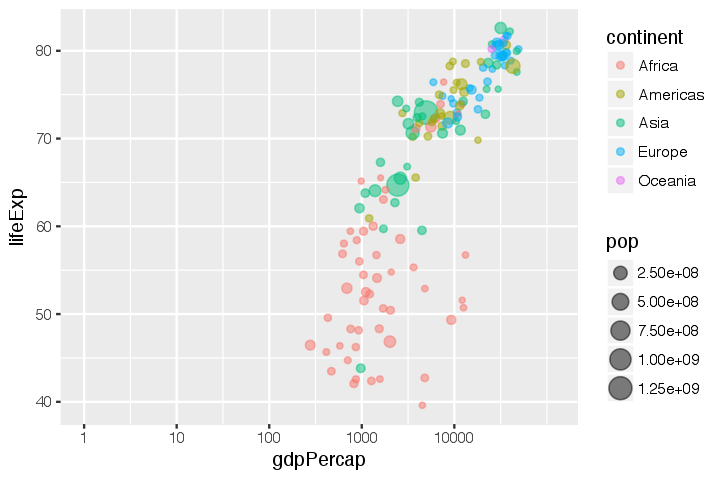

In [16]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  geom_point(alpha = 0.5) +
  # clean the x-axis breaks
  scale_x_log10(breaks = c(1, 10, 100, 1000, 10000),
                limits = c(1, 120000))

Notice that we changed the name of the x-axis in the plot using the `name` arguemnt. This could also be done using the `labs` function. As an example, below we add a title and change the name of the y-axis and legends using the `labs` function.

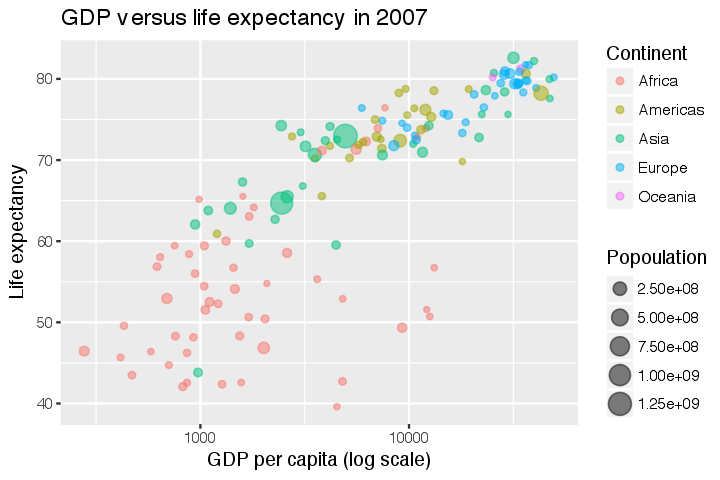

In [17]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  # add scatter points
  geom_point(alpha = 0.5) +
  # log-scale the x-axis
  scale_x_log10() +
  # change labels
  labs(title = "GDP versus life expectancy in 2007",
       x = "GDP per capita (log scale)",
       y = "Life expectancy",
       size = "Popoulation",
       color = "Continent")

We could also manipulate the scale of the size variable. Below, we expand the range of sizes and clean up the variable name. Since the variable we provided for size is a continuous variable (`pop`) we use the `scale_size_continuous` argument.

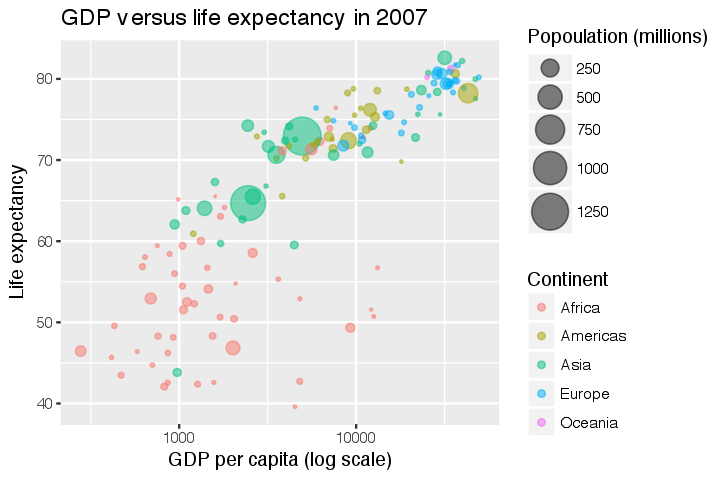

In [18]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  # add scatter points
  geom_point(alpha = 0.5) +
  # log-scale the x-axis
  scale_x_log10() +
  # change labels
  labs(title = "GDP versus life expectancy in 2007",
       x = "GDP per capita (log scale)",
       y = "Life expectancy",
       size = "Popoulation (millions)",
       color = "Continent") +
  # change the size scale
  scale_size(range = c(0.1, 10),
             breaks = 1000000 * c(250, 500, 750, 1000, 1250),
             labels = c("250", "500", "750", "1000", "1250")) 

Scales also exist for other aesthetic featuers such as `fill`, `color`, `alpha`, etc.

# Faceting

Sometimes we want to be able to make multiple plots of the same thing across different categories. This can be achieved with minimal repetition using faceting.

In the example below, we will remake the plot above individually for each continent.

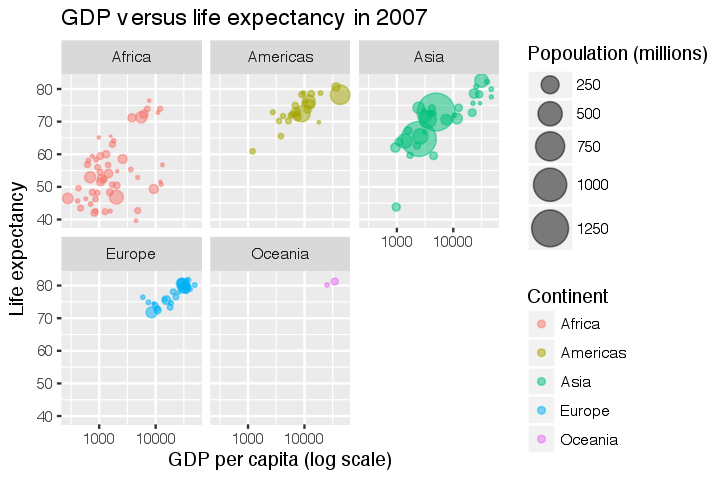

In [19]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  # add scatter points
  geom_point(alpha = 0.5) +
  # log-scale the x-axis
  scale_x_log10() +
  # change labels
  labs(title = "GDP versus life expectancy in 2007",
       x = "GDP per capita (log scale)",
       y = "Life expectancy",
       size = "Popoulation (millions)",
       color = "Continent") +
  # change the size scale
  scale_size(range = c(0.1, 10),
             breaks = 1000000 * c(250, 500, 750, 1000, 1250),
             labels = c("250", "500", "750", "1000", "1250")) +
  # add faceting
  facet_wrap(~continent)

# Themes: making even more beautiful figures with ggplot2

One of the first things I usually do when I make a ggplot is edit the default theme. I actually really don't like the grey background, nor do I like having a grid unless it really helps with the plot interpretation.

One of the simplest themes is `theme_classic`, however there are several other themes to choose from. The `ggthemes` package offers many additional themes, but you could also make your own using the `theme()` function.

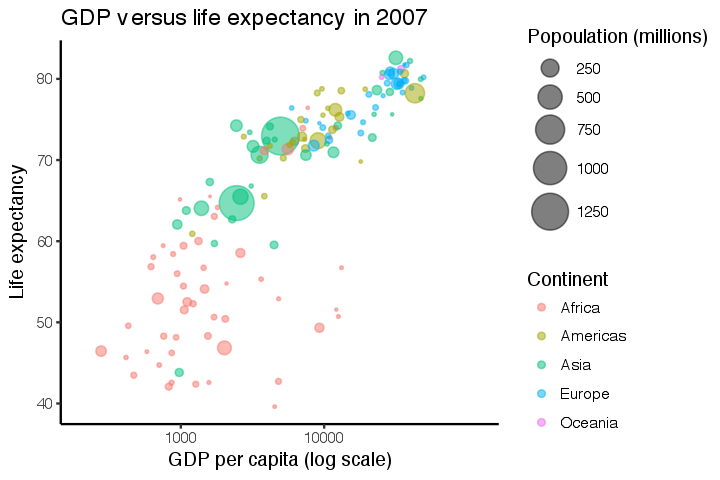

In [20]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  # add scatter points
  geom_point(alpha = 0.5) +
  # clean the axes names and breaks
  scale_x_log10(breaks = c(1000, 10000),
                limits = c(200, 120000)) +
  # change labels
  labs(title = "GDP versus life expectancy in 2007",
       x = "GDP per capita (log scale)",
       y = "Life expectancy",
       size = "Popoulation (millions)",
       color = "Continent") +
  # change the size scale
  scale_size(range = c(0.1, 10),
             breaks = 1000000 * c(250, 500, 750, 1000, 1250),
             labels = c("250", "500", "750", "1000", "1250")) +
  # add a nicer theme
  theme_classic(base_family = "Helvetica")

As an example of further customization of the ggplot theme, below we do the following:

- move the legend to the top (set `legend.position = "top"` in `theme()`)
- removing the population legend (set `guide = "none"` in `scale_size()`)
- remove the axes lines (set `axis.line = element_blank()` in `theme()`)
- add some text annotations (add `geom_text` layer)

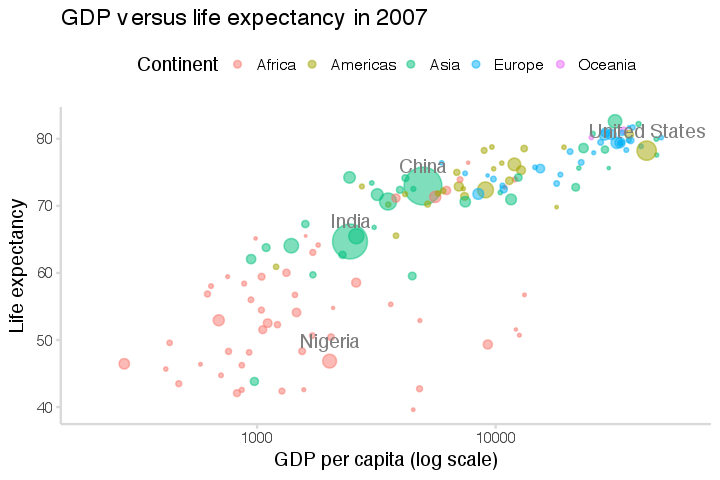

In [21]:
ggplot(gapminder_2007) +
  # add scatter points
  geom_point(aes(x = gdpPercap, y = lifeExp, color = continent, size = pop),
             alpha = 0.5) +
  # add some text annotations for the very large countries
  geom_text(aes(x = gdpPercap, y = lifeExp + 3, label = country),
            color = "grey50",
            data = filter(gapminder_2007, pop > 1000000000 | country %in% c("Nigeria", "United States"))) +
  # clean the axes names and breaks
  scale_x_log10(limits = c(200, 60000)) +
  # change labels
  labs(title = "GDP versus life expectancy in 2007",
       x = "GDP per capita (log scale)",
       y = "Life expectancy",
       size = "Popoulation",
       color = "Continent") +
  # change the size scale
  scale_size(range = c(0.1, 10),
             # remove size legend
             guide = "none") +
  # add a nicer theme
  theme_classic() +
  # place legend at top and grey axis lines
  theme(legend.position = "top",
        axis.line = element_line(color = "grey85"),
        axis.ticks = element_line(color = "grey85"))

# Saving your plots

You can save your plots using the `ggsave()` function.

In [22]:
p <- ggplot(gapminder_2007) +
  # add scatter points
  geom_point(aes(x = gdpPercap, y = lifeExp, color = continent, size = pop),
             alpha = 0.5) +
  # add some text annotations for the very large countries
  geom_text(aes(x = gdpPercap, y = lifeExp + 3, label = country),
            color = "grey50",
            data = filter(gapminder_2007, pop > 1000000000 | country %in% c("Nigeria", "United States"))) +
  # clean the axes names and breaks
  scale_x_log10(limits = c(200, 60000)) +
  # change labels
  labs(title = "GDP versus life expectancy in 2007",
       x = "GDP per capita (log scale)",
       y = "Life expectancy",
       size = "Popoulation",
       color = "Continent") +
  # change the size scale
  scale_size(range = c(0.1, 10),
             # remove size legend
             guide = "none") +
  # add a nicer theme
  theme_classic() +
  # place legend at top and grey axis lines
  theme(legend.position = "top",
        axis.line = element_line(color = "grey85"),
        axis.ticks = element_line(color = "grey85"))

# save the plot
ggsave("beautiful_plot.png", p, dpi = 300, width = 6, height = 4)